In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Pandas version: ', pd.__version__, '/nNumpy version: ', np.__version__, '/nSeaborn version: ', sns.__version__)

Pandas version:  1.5.3 /nNumpy version:  1.23.5 /nSeaborn version:  0.12.2


In [12]:
titanic = pd.read_csv('/Users/alenadenisova/Titanic.csv')

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [15]:
titanic.value_counts(['Sex'])

Sex   
male      577
female    314
dtype: int64

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic['Age'].isnull().sum()

177

In [12]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [13]:
titanic['Age'].isnull().sum()

0

In [11]:
titanic['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

<Figure size 640x480 with 0 Axes>

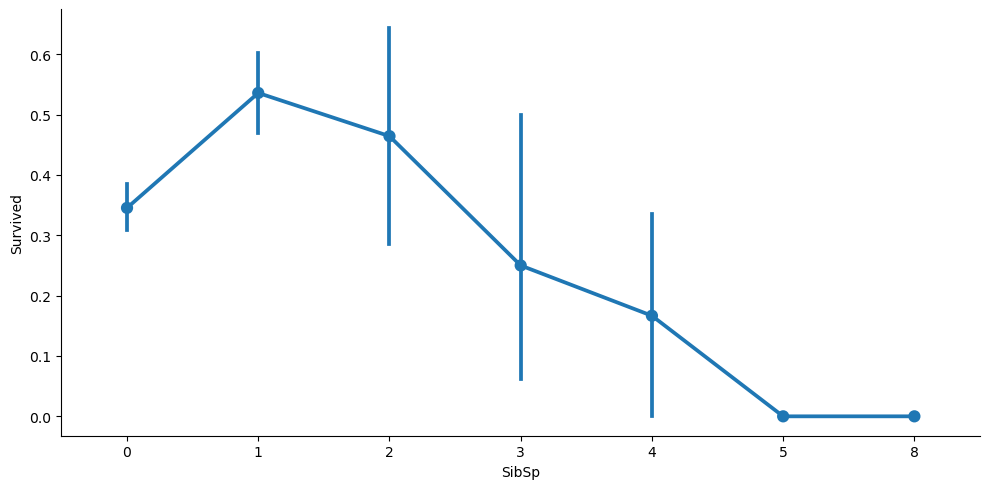

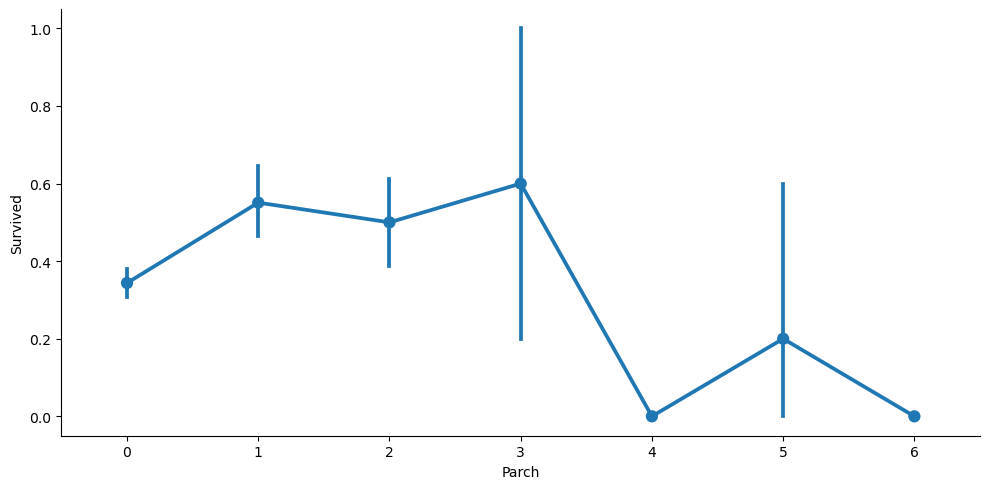

In [14]:
for i, col in enumerate (['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data = titanic, kind = 'point', aspect = 2)

In [15]:
titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']

In [16]:
titanic.drop(['SibSp', 'Parch', 'PassengerId'], axis = 1, inplace = True)

In [17]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [18]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()
#watching the surviving rate. It's much lower, when cabin is missing(cabon.isnull=True)

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [19]:
#method .where is acting like "if"-statement
titanic['Cabin_indicator'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count,Cabin_indicator
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [20]:
gender_numeric = {'male':0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(gender_numeric)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count,Cabin_indicator
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [21]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_indicator
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [22]:
titanic.to_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/Titanic_cleaned.csv', index = False)

In [23]:
from sklearn.model_selection import train_test_split
titanic = pd.read_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/Titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_indicator
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [24]:
titanic.shape

(891, 7)

In [25]:
features = titanic.drop('Survived', axis =1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [26]:
X_train.shape

(534, 6)

In [27]:
y_train.shape

(534,)

In [28]:
for dataset in [y_train, y_val, y_test]:
    print((len(dataset)/len(labels), 2))

(0.5993265993265994, 2)
(0.19977553310886645, 2)
(0.20089786756453423, 2)


In [29]:
X_train.to_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/train_features.csv', index = False)
X_val.to_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/val_features.csv', index = False)
X_test.to_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/test_features.csv', index = False)

y_train.to_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/train_labels.csv', index = False)
y_val.to_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/val_labels.csv', index = False)
y_test.to_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/test_labels.csv', index = False)

In [30]:
from sklearn.linear_model import LogisticRegression
dir(LogisticRegression)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

In [31]:
import joblib
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [32]:
tr_features = pd.read_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/train_features.csv')
tr_labels = pd.read_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/train_labels.csv') #header=None
#column vector type

print('features: ', tr_features.shape)
print('labels: ', tr_labels.shape)

features:  (534, 6)
labels:  (534, 1)


In [53]:
tr_features.head()

,Pclass,Sex,Age,Fare,Family_count,Cabin_indicator
0,2,0,62.0,10.5000,0,0
1,3,0,8.0,29.1250,5,0
2,3,0,32.0,56.4958,0,0
3,3,1,20.0,9.8250,1,0
4,2,1,28.0,13.0000,0,0


In [34]:
def print_results(results):
    print('BEST PARAMS: {}/n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+-{}) for {}'.format(round(mean,3), round(std * 2, 3), params))

In [35]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel()) #.values.ravel - чтобы сделать array из column vector 

print_results(cv)

BEST PARAMS: {'C': 1}/n
0.67 (+-0.077) for {'C': 0.001}
0.708 (+-0.098) for {'C': 0.01}
0.777 (+-0.134) for {'C': 0.1}
0.8 (+-0.118) for {'C': 1}
0.794 (+-0.116) for {'C': 10}
0.794 (+-0.116) for {'C': 100}
0.794 (+-0.116) for {'C': 1000}


/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [36]:
tr_features.head()

,Pclass,Sex,Age,Fare,Family_count,Cabin_indicator
0,2,0,62.0,10.5000,0,0
1,3,0,8.0,29.1250,5,0
2,3,0,32.0,56.4958,0,0
3,3,1,20.0,9.8250,1,0
4,2,1,28.0,13.0000,0,0


In [37]:
tr_features.shape

(534, 6)

In [38]:
tr_labels.shape

(534, 1)

In [39]:
cv.best_estimator_

LogisticRegression(C=1)

In [40]:
joblib.dump(cv.best_estimator_, '/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/LR_model.pkl')

['/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/LR_model.pkl']

In [41]:
from sklearn.svm import SVC #support vector classifier
SVC()
dir(SVC)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_class_weight',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_estimator_type',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_predict_proba',
 '_validate_data',
 '_validate_fo

In [42]:
#SUPPORT VECTOR MACHINE:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'], 
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel()) #.values.ravel - чтобы сделать array из column vector 

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}/n
0.796 (+-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+-0.07) for {'C': 10, 'kernel': 'rbf'}


In [43]:
cv.best_estimator_ #this is an actual model, that we can save and open later

SVC(C=0.1, kernel='linear')

In [44]:
joblib.dump(cv.best_estimator_, '/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/SVM_model.pkl')

['/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/SVM_model.pkl']

In [45]:
#MULTILAYER PERCEPTRON:

from sklearn.neural_network import MLPRegressor, MLPClassifier
print(MLPRegressor())
print(MLPClassifier())

MLPRegressor()
MLPClassifier()


In [46]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)], #10,50,100-nodes, 1 layer
    'activation': ['relu', 'tanh', ''],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}    
#invscaling - larger steps at first, smaller later
#adaptive - keeps LR constant, while the training loss keeps decreasing, 
#and whem it stops, LR will be decreased, so that it takes smaller steps

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel()) #.values.ravel - чтобы сделать array из column vector 

print_results(cv)

/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}/n
0.74 (+-0.124) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.729 (+-0.14) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.734 (+-0.104) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.792 (+-0.123) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.781 (+-0.135) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.787 (+-0.119) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.811 (+-0.099) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.796 (+-0.106) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.792 (+-0.105) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate':

/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
cv.best_estimator_

MLPClassifier(activation='tanh')

In [48]:
joblib.dump(cv.best_estimator_,'/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/MLP_model.pkl')

['/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/MLP_model.pkl']

In [49]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
print(RandomForestClassifier())
print(RandomForestRegressor())

RandomForestClassifier()
RandomForestRegressor()


In [55]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}/n
0.794 (+-0.113) for {'max_depth': 2, 'n_estimators': 5}
0.805 (+-0.108) for {'max_depth': 2, 'n_estimators': 50}
0.8 (+-0.111) for {'max_depth': 2, 'n_estimators': 250}
0.8 (+-0.083) for {'max_depth': 4, 'n_estimators': 5}
0.82 (+-0.117) for {'max_depth': 4, 'n_estimators': 50}
0.824 (+-0.11) for {'max_depth': 4, 'n_estimators': 250}
0.824 (+-0.09) for {'max_depth': 8, 'n_estimators': 5}
0.818 (+-0.072) for {'max_depth': 8, 'n_estimators': 50}
0.815 (+-0.088) for {'max_depth': 8, 'n_estimators': 250}
0.796 (+-0.032) for {'max_depth': 16, 'n_estimators': 5}
0.807 (+-0.029) for {'max_depth': 16, 'n_estimators': 50}
0.807 (+-0.022) for {'max_depth': 16, 'n_estimators': 250}
0.803 (+-0.05) for {'max_depth': 32, 'n_estimators': 5}
0.813 (+-0.038) for {'max_depth': 32, 'n_estimators': 50}
0.811 (+-0.036) for {'max_depth': 32, 'n_estimators': 250}
0.773 (+-0.069) for {'max_depth': None, 'n_estimators': 5}
0.813 (+-0.021) for {'max_depth': N

In [56]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=250)

In [57]:
joblib.dump(cv.best_estimator_, '/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/RF_model.pkl')

['/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/RF_model.pkl']

In [52]:
#BOOSTING

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

gb = GradientBoostingClassifier()
parameters={
    'n_estimators':[5, 50, 250, 500],
    'max_depth':[1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}
#max_depth = 1-"Decision Stump"

cv = GridSearchCV(gb, parameters, cv = 5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

KeyboardInterrupt: 

In [ ]:
joblib.dump(cv.best_estimator_, '/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/GB_model.pkl')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time



In [ ]:
val_features = pd.read_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/val_features.csv')
val_labels = pd.read_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/val_labels.csv') #header=None
#column vector type

te_features =pd.read_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/test_features.csv')
te_labels = pd.read_csv('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/test_labels.csv')

print('val features shape: ', val_features.shape)
print('val labels shape: ', val_labels.shape)
print('test features shape: ', te_features.shape)
print('test labels shape: ', te_labels.shape)

In [ ]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('/Users/alenadenisova/Downloads/Ex_Files_Machine_Learning_Algorithms/Exercise Files/{}_model.pkl'.format(mdl))
    

In [ ]:
models

In [ ]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred),3)
    precision = round(precision_score(labels, pred),3)
    recall = round(recall_score(labels, pred),3)
    print('{} -- Accuracy: {} /  Precision: {} /  Recall: {} / Latency: {} ms'.format(name, 
                                                                                      accuracy,  
                                                                                      precision, 
                                                                                      recall, 
                                                                                      round((end - start)*1000, 1)))
    


In [ ]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)
    

In [ ]:
evaluate_model('Gradient Boosting', models['GB'], te_features, te_labels)

In [ ]:
te_features